In [1]:
import csv
import math

In [2]:
def angle(x,y,z):
    return math.atan2(math.sqrt(z**2+y**2),x)

In [3]:
from glob import glob
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import h5py
import numpy as np
from skimage.color import rgb2gray
from skimage.util import montage
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})
try:
    from tqdm import tqdm
except ImportError:
    print('Missing tqdm...')
    tqdm = lambda x: x
data_dir = os.path.join('..', 'input')

In [4]:
# load the data file and extract dimensions
with h5py.File('gaze.h5','r') as t_file:
    print(list(t_file.keys()))
    assert 'image' in t_file, "Images are missing"
    assert 'look_vec' in t_file, "Look vector is missing"
    look_vec = t_file['look_vec'].value
    assert 'path' in t_file, "Paths are missing"
    print('Images found:',len(t_file['image']))
    for _, (ikey, ival) in zip(range(1), t_file['image'].items()):
        print('image',ikey,'shape:',ival.shape)
        img_width, img_height = ival.shape
    syn_image_stack = np.stack([a for a in t_file['image'].values()],0)

['image', 'look_vec', 'path']


<ipython-input-4-9e5d51f83d1d>:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  look_vec = t_file['look_vec'].value


Images found: 50000
image ..\..\..\..\Downloads\UnityEyes_Windows\UnityEyes_Windows\imgs\1.jpg shape: (35, 55)


In [5]:
head_pose = []
with open('gaze.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    for row in csv_reader:
        temp1, temp2, temp3 = repr({row[4]}).split(", ")
        fixed1 = temp1.split("(")
        fixed3 = temp3.split(")")
        head_pose.append([round(float(fixed1[1]),4),round(float(temp2)-180,4),float(fixed3[0])])

In [6]:
def to_deg(x):
    temp = x*180/math.pi
    return temp
    
def to_rad(x):
    temp = x*math.pi/180
    return temp

def vector(angle): # Use radians
    x = math.cos(angle)
    y = math.sin(angle)
    return x,y

def angle_between(angle1, angle2): #angles in degrees
    theta1 = vector(to_rad(angle1))
    theta2 = vector(to_rad(angle2))
    x, y, z = theta1[0]+theta2[1], theta1[1], theta2[0]
    return x, y, z

(35, 55)
Angle: 21.28


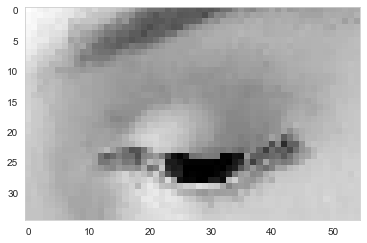

In [11]:
index = 3
#print("--HEAD ANGLE--",head_pose[index])
head = angle_between(head_pose[index][0],head_pose[index][1])
#print(head)
plt.imshow(syn_image_stack[index],cmap='gray')
print(syn_image_stack[index].shape)
a,b,c,d = look_vec[index]
#print("--AB--",a*90,b*90)
eye = angle_between(a*90,b*90)
#print(eye)
x = head[0]-eye[0]
y = head[1]-eye[1]
z = head[2]-eye[2]
#print(x,y,z)
actual = to_deg(angle(x,y,z))
print("Angle:",round(actual,2))